# KNN Machine Learning Techniques
* Notebook by Adam Lang
* Date: 4/9/2025

# What is KNN
* kNN stands for “k-Nearest Neighbors”.
* It is a simple machine learning algorithm used for classification or regression tasks.
* The basic idea is to find the ‘k’ closest data points in the training set to a given test data point and use the labels of those closest points to make a prediction for the test point.


# How to use KNN?
* Let’s say we have a dataset of 50 items, where each item has 2 features:

1. length
2. width

* Our Goal is to classify a new item based on these 2 features of length and width using kNN.
* Let's say the new item has a length of 5.2 and a width of 1.8 and we want to find the kNN of 3, how would we do that?

## Steps
1. **Calculate Distance**
  * You need to find the distance between the new item and the k nearest neighbors.
  * Distance metrics can vary based on the dataset but are often:
    * **Euclidean**
      * MOST COMMON metric.
      * Straight line shortest distance between 2 points.
    * **Manhattan**
      * "Taxi cab or city block" distance.
      * Sum absolute difference of coordinates.
    * **Minkowski**
      * Generalization of BOTH Euclidean and Manhattan.


2. **Select k nearest neighbors**
* This is based on the calculated distances.

3. **Classification**
  * Classify the new item based on the majority class of the kNN.


# Distance Metrics in Detail
1. Euclidean
  * MOST COMMON metric.
  * Straight line distance.
  * Advantages
    1. Easy to compute and widely used in many applications.
    2. Sensitive to differences in all dimensions, not just some of them. So its can accurrately represent ‘similarity’

  * Disadvantages
    1. Affected by the scale of the features.
      * Features with **larger values can dominate the distance calculation.**


2. Mahattan
  * "Taxicab or city block distance".
  * Absolute differences of 2 coordinates.
  * Advantages
    1. Also easy to compute and works well with datasets that have high dimensionality.

  * Disadvantages
    1. Does not take into account the actual distance between two points, only the sum of the differences in their coordinates.

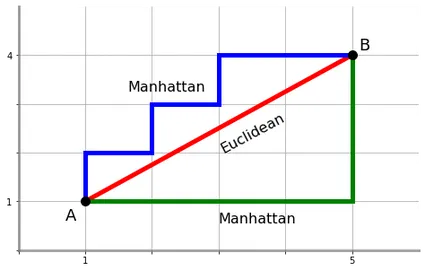




3. Minkowski
  * Generalized metric using both the Euclidean and Manhattan distances.
  * Advantages
    1. Allows you to control the order of the distance metric based on the nature of the problem.

  * Disadvantages
    1. Requires you to select an appropriate value for the parameter p.

## How do you select the distance metric?
1. Euclidean distance
  * Good default choice for **continuous data.**
  * Works well when the data is dense and the differences between features are important.

2. Manhattan distance
  * Good choice when the data has many outliers or when the scale of the features is different.
  * As an example, if we are comparing distances between two cities, the distance metric should not be affected by the difference in elevation or terrain between the cities.

3. Minkowski distance
  * A minkowski distance with p=1 is equivalent to Manhattan distance, and Minkowski distance with p=2 is equivalent to Euclidean distance.
  * Thus, if you are unsure which distance metric to use, you could try experimenting with different values of p in the Minkowski distance.


# When would you use KNN?
Disadvantages

1. Can be sensitive to the choice of distance metric used to calculate the distances between data points.
  * Different distance metrics may yield different results for the same dataset.

2. Can also be sensitive to the choice of k, the number of nearest neighbors to consider.
  * Choosing k too small may lead to overfitting, while choosing k too large may lead to underfitting.

3. Can be computationally expensive, especially for large datasets, since it involves calculating distances between the query point and all data points in the dataset.
  * May not work well with high-dimensional data, since the curse of dimensionality can cause the distances between data points to become very similar, making it hard to identify the k-nearest neighbors.

Advantages
  * A simple and intuitive algorithm that is easy to understand and implement.
  * Can work well with both binary and multi-class classification problems.
  * Can also be used for both classification and regression problems
  * Can handle both linear and nonlinear decision boundaries.
  * Does NOT require any assumptions about the underlying distribution of the data.

### Most ideal use cases
1. Best suited for small to medium-sized datasets with relatively low dimensionality.

2. Can be useful in situations where the decision boundary is highly irregular or nonlinear.

3. Can be effective in cases where the data is clustered or has distinct groups.

4. Can be used as a baseline algorithm to compare the performance of other, more complex models.

5. In general, kNN is a useful and versatile algorithm that can be a good starting point for many machine learning problems.
  * However, it is important to keep in mind its limitations and drawbacks, and to carefully choose the distance metric and value of k based on the nature of the problem and the data.

# Variations of KNN
1. Weighted KNN
2. Ball Tree KNN
3. Radius KNN

* [Source](https://medium.com/codex/data-scientists-interview-guide-k-nearest-neighbor-7a964ab3fa93)

# KNN from Scratch

In [1]:
import numpy as np

In [2]:
## kNN class
class KNN:
  def __init__(self, k):
    self.k = k

  ## 1. fit x and y train data
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  ## 2. Predict on test set
  def predict(self, X):
    y_pred = np.zeros(X.shape[0])

    ## Calculate distance --> Select knn --> Classify
    for val, X_test in enumerate(X):
      ## 1. Calculate distance metric: X_test difference to all train data
      ## metric: Euclidean (straight line)
      ## formula: d(A,B) = sqrt((A1-B1)² + (A2-B2)² + … + (An-Bn)²)
      distances = np.sqrt(np.sum((self.X_train - X_test) ** 2, axis=1))

      ## 2. Select KNN via indices -- index on self.k
      k_indices = np.argsort(distances)[:self.k]

      ## 2b. Get labels of KNN
      k_labels = self.y_train[k_indices]

      ## 3. Classify -- most common label assigned to y_pred[val]
      ## np.bincount counts occurrences of each  KNN label --> assign to most common
      y_pred[val] = np.bincount(k_labels).argmax()

    return y_pred

In [4]:
%%capture
!pip install sklearn

In [7]:
# Generate random data for x and y
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = np.random.randint(0, 2, 100)  # 100 labels (0 or 1)



## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
## print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [9]:
## init class KNN
model_1 = KNN(k=3)

## fit model
model_1.fit(X_train, y_train)

## predict
result = model_1.predict(X_test)
result

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0.])

In [10]:
type(result)

numpy.ndarray

In [11]:
np.argmax(result)

np.int64(2)

# Assumptions
1. Can we assume we can use the euclidean distance?
2. Can we assume we have input features X and y such as:
  * numpy array n x d --> matrix
  * n = num examples, d = num features

3. KNN
  * We predict knn based on incoming data point.

```
functions to define
1. calculate euclidean distance
2. KNN inference

```

In [33]:
## 1. distance function
import numpy as np

def euc_dist(x: np.ndarray,
             y: np.ndarray) -> float:
  return np.sqrt((x-y).T.dot(x-y))


# 2. knn inference
def knn(X_train: np.ndarray,
        y_train: np.ndarray,
        X_new: np.ndarray,
        k: int) -> float:


  ## 1. distances
  distances = [] ## store in list

  ## loop through ndarray and get index with data point
  for X_i in X_train:
    ## take in index, new data point X_new
    distance = euc_dist(X_i, X_new)
    distances.append(distance) ## append to distances list


  ## get top indices and labels
  top_k_indices = np.argsort(distances)[:k]


  top_k_labels = [y_train[idx].item() for idx in top_k_indices]

  # breakpoint() ## debug breakpoint

  ## return majority vote -- binary so k/2
  if sum(top_k_labels) > (k / 2):
    return 1

  else:
    return 0




In [34]:
## create dummy training data
X_train = np.array([
    [0,0],
    [0,1],
    [2,0],
    [2,2],
    [2,1],
])
y_train = np.array([0,0,0,1,1])

# ## Test case 1:
# X_new = np.array([0,0])
# k=3

## Test case 2:
X_new = np.array([2, 2]) ## should be 1?
k = 3

In [35]:
print(knn(X_train, y_train, X_new, k))

1
